In [1]:
#Data from https://fred.stlouisfed.org/series/DCOILBRENTEU
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DCOILWTICO10Y.csv to DCOILWTICO10Y.csv


In [3]:
import io
oil = pd.read_csv(io.BytesIO(uploaded['DCOILWTICO10Y.csv']))

In [4]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        2609 non-null   object
 1   DCOILWTICO  2609 non-null   object
dtypes: object(2)
memory usage: 40.9+ KB


In [5]:
# Convert exchange rate to a number, with coercion to throw `NA` values if conversion not possible
oil['DCOILWTICO'] = pd.to_numeric(oil['DCOILWTICO'], errors='coerce')

# Remove `NA` values
oil.dropna(inplace=True)

In [6]:
oil.head()

,DATE,DCOILWTICO
0,2012-03-14,105.49
1,2012-03-15,105.19
2,2012-03-16,107.03
3,2012-03-19,108.09
4,2012-03-20,105.68


In [7]:
oil.tail()

,DATE,DCOILWTICO
2604,2022-03-08,123.64
2605,2022-03-09,108.81
2606,2022-03-10,105.93
2607,2022-03-11,109.31
2608,2022-03-14,103.22


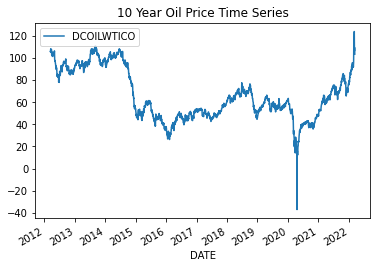

In [8]:
# Looking at the 10 year series
oil.index = pd.to_datetime(oil.DATE)
oil.plot()
plt.title('10 Year Oil Price Time Series')
plt.show()

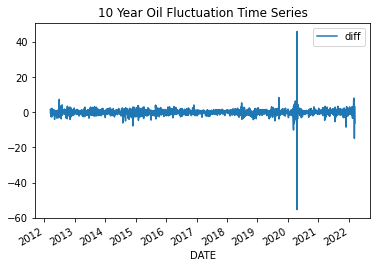

In [9]:
# Looking at the 10 year fluctuations
oil['diff'] = oil['DCOILWTICO'] - oil['DCOILWTICO'].shift()
oil.plot(y='diff')
plt.title('10 Year Oil Fluctuation Time Series')
plt.show()

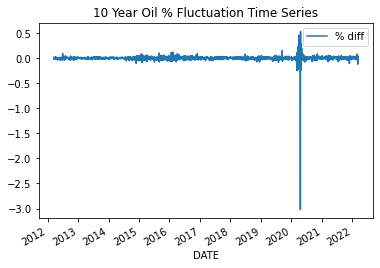

In [10]:
# Looking at the 10 year percentage fluctuations
oil['% diff'] = (oil['DCOILWTICO'] - oil['DCOILWTICO'].shift())/oil['DCOILWTICO'].shift()
oil.plot(y='% diff')
plt.title('10 Year Oil % Fluctuation Time Series')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, '10 Year Oil PACF')

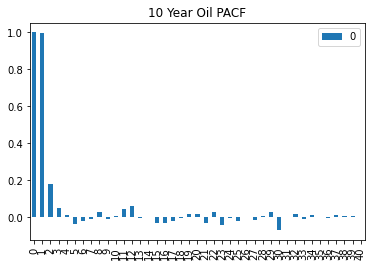

In [ ]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(oil['DCOILWTICO']))
x_acf.plot(kind='bar')
plt.title("10 Year Oil PACF")

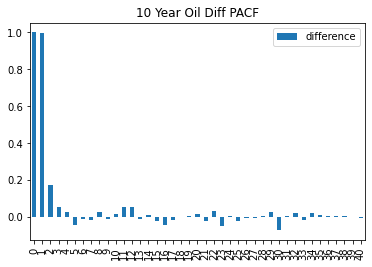

In [ ]:
x_acf = pd.DataFrame(pacf(oil['DCOILWTICO'][1:]))
x_acf.plot(kind='bar')
plt.title("10 Year Oil Diff PACF")
plt.legend(['difference'])

In [11]:
# Trying different p, d, and q values as part of the order
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(oil['DCOILWTICO'], order=(0,1,0))
model_010f = model_010.fit()
print(model_010f.summary())
print('Residuals Description')
print(model_010f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5304.593
Method:                           css   S.D. of innovations              2.001
Date:                Thu, 24 Mar 2022   AIC                          10613.186
Time:                        05:30:53   BIC                          10624.843
Sample:                             1   HQIC                         10617.417
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.040     -0.023      0.982      -0.079       0.077
Residuals Description
count    2.511000e+03
mean     1.425118e-15
std      2.001311e+00
min     -5.528910e+01
25%     -7.190960e-01

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
from statsmodels.tsa.arima_model import ARIMA
model_110 = ARIMA(oil['DCOILWTICO'], order=(1,1,0))
model_110f = model_110.fit()
print(model_110f.summary())
print('Residuals Description')
print(model_110f.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5228.890
Method:                       css-mle   S.D. of innovations              1.941
Date:                Thu, 24 Mar 2022   AIC                          10463.781
Time:                        05:30:57   BIC                          10481.266
Sample:                             1   HQIC                         10470.127
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0004      0.031     -0.013      0.990      -0.062       0.061
ar.L1.D.DCOILWTICO    -0.2423      0.019    -12.493      0.000      -0.280      -0.204
                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [13]:
model_101 = ARIMA(oil['DCOILWTICO'], order=(1,0,1))
model_101f = model_101.fit()
print(model_101f.summary())
print('Residuals Description')
print(model_101f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             DCOILWTICO   No. Observations:                 2512
Model:                     ARMA(1, 1)   Log Likelihood               -5223.497
Method:                       css-mle   S.D. of innovations              1.934
Date:                Thu, 24 Mar 2022   AIC                          10454.994
Time:                        05:31:07   BIC                          10478.309
Sample:                             0   HQIC                         10463.456
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               79.5318     16.792      4.736      0.000      46.620     112.443
ar.L1.DCOILWTICO     0.9985      0.001    965.148      0.000       0.997       1.001
ma.L1.DCOILWTICO    -0.2704 

In [14]:
model_111 = ARIMA(oil['DCOILWTICO'], order=(1,1,1))
model_111f = model_111.fit()
print(model_111f.summary())
print('Residuals Description')
print(model_111f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5219.013
Method:                       css-mle   S.D. of innovations              1.934
Date:                Thu, 24 Mar 2022   AIC                          10446.027
Time:                        05:31:12   BIC                          10469.341
Sample:                             1   HQIC                         10454.489
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.027     -0.010      0.992      -0.054       0.053
ar.L1.D.DCOILWTICO     0.0873      0.071      1.229      0.219      -0.052       0.227
ma.L1.D.DCOILWTICO  

In [16]:
model_212 = ARIMA(oil['DCOILWTICO'], order=(2,1,2))
model_212f = model_212.fit()
print(model_212f.summary())
print('Residuals Description')
print(model_212f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5217.997
Method:                       css-mle   S.D. of innovations              1.933
Date:                Thu, 24 Mar 2022   AIC                          10447.995
Time:                        05:33:44   BIC                          10482.965
Sample:                             1   HQIC                         10460.688
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.027     -0.011      0.992      -0.054       0.053
ar.L1.D.DCOILWTICO    -0.8526      0.084    -10.182      0.000      -1.017      -0.689
ar.L2.D.DCOILWTICO  

In [17]:
model_202 = ARIMA(oil['DCOILWTICO'], order=(2,0,2))
model_202f = model_202.fit()
print(model_202f.summary())
print('Residuals Description')
print(model_202f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             DCOILWTICO   No. Observations:                 2512
Model:                     ARMA(2, 2)   Log Likelihood               -5222.812
Method:                       css-mle   S.D. of innovations              1.933
Date:                Thu, 24 Mar 2022   AIC                          10457.625
Time:                        05:33:55   BIC                          10492.598
Sample:                             0   HQIC                         10470.318
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               80.1243     17.263      4.641      0.000      46.289     113.960
ar.L1.DCOILWTICO     1.1370      0.186      6.098      0.000       0.772       1.502
ar.L2.DCOILWTICO    -0.1382 

In [19]:
model_313 = ARIMA(oil['DCOILWTICO'], order=(3,1,3))
model_313f = model_313.fit()
print(model_313f.summary())
print('Residuals Description')
print(model_313f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5215.402
Method:                       css-mle   S.D. of innovations              1.931
Date:                Thu, 24 Mar 2022   AIC                          10446.804
Time:                        05:34:40   BIC                          10493.431
Sample:                             1   HQIC                         10463.728
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003      0.034      0.009      0.993      -0.067       0.067
ar.L1.D.DCOILWTICO     0.1709      0.091      1.882      0.060      -0.007       0.349
ar.L2.D.DCOILWTICO  

In [20]:
model_310 = ARIMA(oil['DCOILWTICO'], order=(3,1,0))
model_310f = model_310.fit()
print(model_310f.summary())
print('Residuals Description')
print(model_310f.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -5218.923
Method:                       css-mle   S.D. of innovations              1.934
Date:                Thu, 24 Mar 2022   AIC                          10447.846
Time:                        05:34:49   BIC                          10476.988
Sample:                             1   HQIC                         10458.423
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0004      0.028     -0.013      0.990      -0.055       0.054
ar.L1.D.DCOILWTICO    -0.2646      0.020    -13.252      0.000      -0.304      -0.225
ar.L2.D.DCOILWTICO  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [21]:
model_210 = ARIMA(oil['DCOILWTICO'], order=(2,1,0))
model_210f = model_210.fit()
print(model_210f.summary())
print('Residuals Description')
print(model_210f.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5221.046
Method:                       css-mle   S.D. of innovations              1.935
Date:                Thu, 24 Mar 2022   AIC                          10450.093
Time:                        05:35:27   BIC                          10473.406
Sample:                             1   HQIC                         10458.555
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0004      0.029     -0.013      0.989      -0.057       0.056
ar.L1.D.DCOILWTICO    -0.2613      0.020    -13.118      0.000      -0.300      -0.222
ar.L2.D.DCOILWTICO  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
model_323 = ARIMA(oil['DCOILWTICO'], order=(3,2,3))
model_323f = model_323.fit()
print(model_323f.summary())
print('Residuals Description')
print(model_323f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overf

                             ARIMA Model Results                              
Dep. Variable:          D2.DCOILWTICO   No. Observations:                 2510
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -5218.678
Method:                       css-mle   S.D. of innovations              1.932
Date:                Thu, 24 Mar 2022   AIC                          10453.355
Time:                        05:35:41   BIC                          10499.980
Sample:                             2   HQIC                         10470.279
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.592e-05    3.9e-05      1.946      0.052   -5.58e-07       0.000
ar.L1.D2.DCOILWTICO    -0.8777      0.154     -5.704      0.000      -1.179      -0.576
ar.L2.D2.DCOILWT

In [23]:
model_211 = ARIMA(oil['DCOILWTICO'], order=(2,1,1))
model_211f = model_211.fit()
print(model_211f.summary())
print('Residuals Description')
print(model_211f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5218.996
Method:                       css-mle   S.D. of innovations              1.934
Date:                Thu, 24 Mar 2022   AIC                          10447.992
Time:                        05:35:50   BIC                          10477.134
Sample:                             1   HQIC                         10458.569
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.027     -0.010      0.992      -0.054       0.053
ar.L1.D.DCOILWTICO     0.1120      0.147      0.762      0.446      -0.176       0.400
ar.L2.D.DCOILWTICO  

In [24]:
model_311 = ARIMA(oil['DCOILWTICO'], order=(3,1,1))
model_311f = model_311.fit()
print(model_311f.summary())
print('Residuals Description')
print(model_311f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.DCOILWTICO   No. Observations:                 2511
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -5218.693
Method:                       css-mle   S.D. of innovations              1.934
Date:                Thu, 24 Mar 2022   AIC                          10449.386
Time:                        05:35:57   BIC                          10484.357
Sample:                             1   HQIC                         10462.079
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.027     -0.011      0.991      -0.054       0.053
ar.L1.D.DCOILWTICO    -0.0577      0.278     -0.208      0.835      -0.602       0.486
ar.L2.D.DCOILWTICO  

In [25]:
model_321 = ARIMA(oil['DCOILWTICO'], order=(3,2,1))
model_321f = model_321.fit()
print(model_321f.summary())
print('Residuals Description')
print(model_321f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D2.DCOILWTICO   No. Observations:                 2510
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -5219.633
Method:                       css-mle   S.D. of innovations              1.933
Date:                Thu, 24 Mar 2022   AIC                          10451.265
Time:                        05:36:09   BIC                          10486.234
Sample:                             2   HQIC                         10463.958
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.547e-05    3.8e-05      1.983      0.047    8.93e-07       0.000
ar.L1.D2.DCOILWTICO    -0.2657      0.020    -13.303      0.000      -0.305      -0.227
ar.L2.D2.DCOILWT

In [26]:
model_221 = ARIMA(oil['DCOILWTICO'], order=(2,2,1))
model_221f = model_221.fit()
print(model_221f.summary())
print('Residuals Description')
print(model_221f.resid.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D2.DCOILWTICO   No. Observations:                 2510
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -5221.884
Method:                       css-mle   S.D. of innovations              1.934
Date:                Thu, 24 Mar 2022   AIC                          10453.768
Time:                        05:36:15   BIC                          10482.908
Sample:                             2   HQIC                         10464.345
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 7.54e-05   3.97e-05      1.897      0.058    -2.5e-06       0.000
ar.L1.D2.DCOILWTICO    -0.2623      0.020    -13.164      0.000      -0.301      -0.223
ar.L2.D2.DCOILWT

Text(0.5, 1.0, 'Histogram of Residuals')

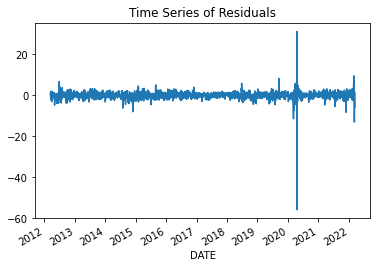

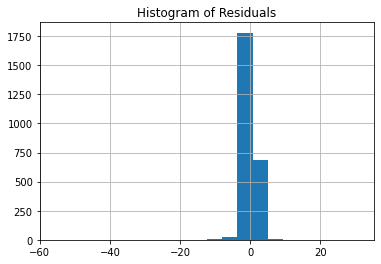

In [27]:
# model_111 gives the lowest AIC at 10446.
residuals = pd.DataFrame(model_111f.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [28]:
# model_010 has the highest AIC 10613. model_101 has AIC of 10455. model_202 has AIC of 10458. model_212, model_211, and model_310 have AIC of 10448. model_210 has AIC of 10450. model_313 has AIC of 10447. model_311 has AIC of 10449. I will compare the information loss between the lowest AIC model and the others next.

In [29]:
import math

In [30]:
math.exp((10446-10613)/2)

5.450178937907168e-37

In [31]:
math.exp((10446-10455)/2)

0.011108996538242306

In [32]:
math.exp((10446-10458)/2)

0.0024787521766663585

In [33]:
math.exp((10446-10448)/2)

0.36787944117144233

In [34]:
math.exp((10446-10450)/2)

0.1353352832366127

In [50]:
# The testing suggests that there is a very small probability that less information was lost in model_010, model_101, and model_202. I will split the data next into train and test dating back two years from the most recent date, predict the test set, and compare the mean-squared errors, mean absolute errors, and mean absolute percentage errors for the orders 111, 211, and 310. 

In [36]:
# Splitting the data into train and test
train = oil[oil["DATE"] < "2020-03-14"]
test = oil[oil["DATE"] >= "2020-03-14"]

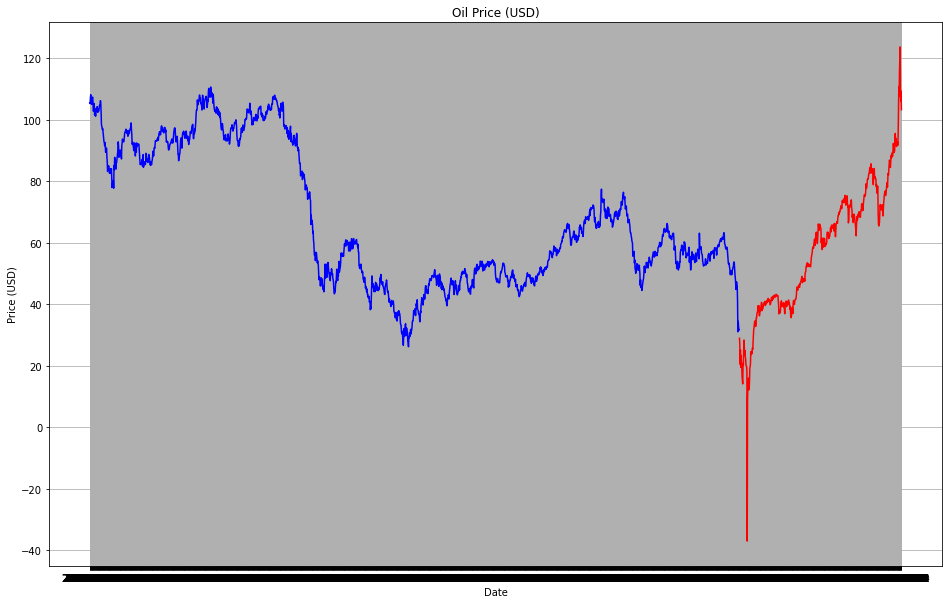

In [37]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(train['DATE'], train['DCOILWTICO'], 'blue', label = 'Train data')
plt.plot(test['DATE'], test['DCOILWTICO'], 'red', label = 'Test data')
plt.title('Oil Price (USD)')
plt.show()

In [38]:
train_val = train['DCOILWTICO'].values
test_val = test['DCOILWTICO'].values

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Looking at predicting the prices at the 30-day interval using model_111
history = [x for x in train_val]
predictions = []
for t in range(17):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(30)
    yhats = output[0]
    predictions.extend(yhats)
    history.extend(test_val[t * 30 : (t + 1) * 30])
mse = mean_squared_error(test_val, predictions[:502])
mae = mean_absolute_error(test_val, predictions[:502])
mape = mean_absolute_percentage_error(test_val, predictions[:502])
print('Testing Mean Squared Error: %.3f' % mse)
print('Testing Mean Absolute Error: %.3f' % mae)
print('Testing Mean Absolute Percentage Error: %.3f' % mape)

Testing Mean Squared Error: 74.335
Testing Mean Absolute Error: 5.865
Testing Mean Absolute Percentage Error: 0.134


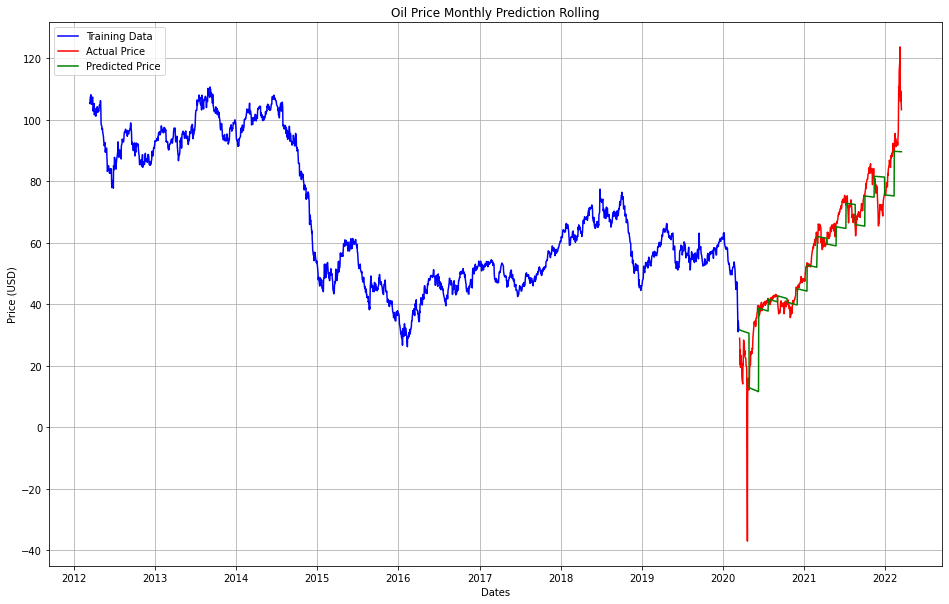

In [40]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['DCOILWTICO'], color='blue', label='Training Data')
plt.plot(test.index, test['DCOILWTICO'], color='red', label='Actual Price')
plt.plot(test.index, predictions[:502], color='green', label='Predicted Price')
plt.title('Oil Price Monthly Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [41]:
# Looking at predicting the prices at the bi-weekly interval using model_111
history = [x for x in train_val]
predictions = []
for t in range(36):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(14)
    yhats = output[0]
    predictions.extend(yhats)
    history.extend(test_val[t * 14 : (t + 1) * 14])
mse = mean_squared_error(test_val, predictions[:502])
mae = mean_absolute_error(test_val, predictions[:502])
mape = mean_absolute_percentage_error(test_val, predictions[:502])
print('Testing Mean Squared Error: %.3f' % mse)
print('Testing Mean Absolute Error: %.3f' % mae)
print('Testing Mean Absolute Percentage Error: %.3f' % mape)

Testing Mean Squared Error: 35.237
Testing Mean Absolute Error: 3.720
Testing Mean Absolute Percentage Error: 0.086


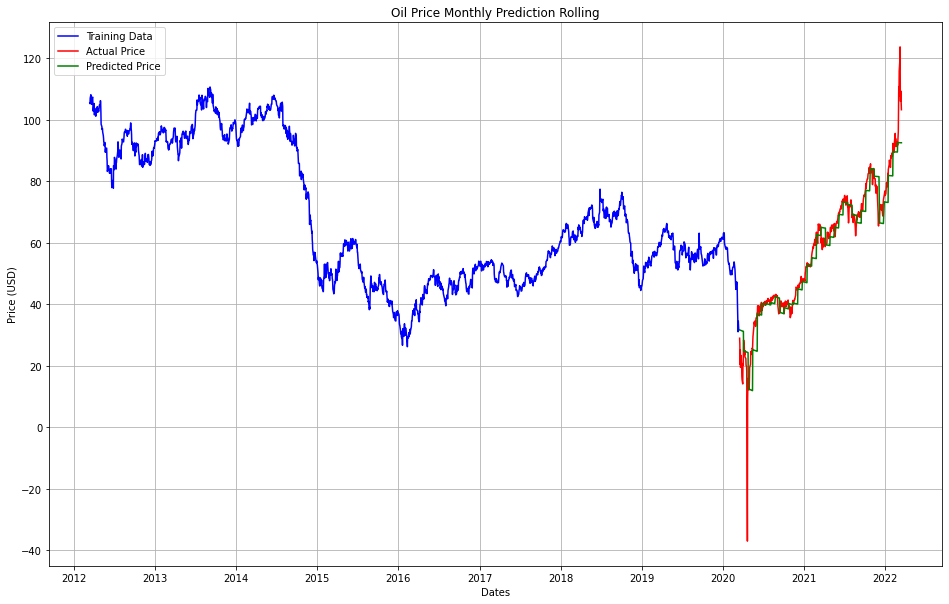

In [42]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['DCOILWTICO'], color='blue', label='Training Data')
plt.plot(test.index, test['DCOILWTICO'], color='red', label='Actual Price')
plt.plot(test.index, predictions[:502], color='green', label='Predicted Price')
plt.title('Oil Price Monthly Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [43]:
# Looking at predicting the prices at the weekly interval
history = [x for x in train_val]
predictions = []
for t in range(72):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(7)
    yhats = output[0]
    predictions.extend(yhats)
    history.extend(test_val[t * 7 : (t + 1) * 7])
mse = mean_squared_error(test_val, predictions[:502])
mae = mean_absolute_error(test_val, predictions[:502])
mape = mean_absolute_percentage_error(test_val, predictions[:502])
print('Testing Mean Squared Error: %.3f' % mse)
print('Testing Mean Absolute Error: %.3f' % mae)
print('Testing Mean Absolute Percentage Error: %.3f' % mape)

Testing Mean Squared Error: 20.353
Testing Mean Absolute Error: 2.526
Testing Mean Absolute Percentage Error: 0.056


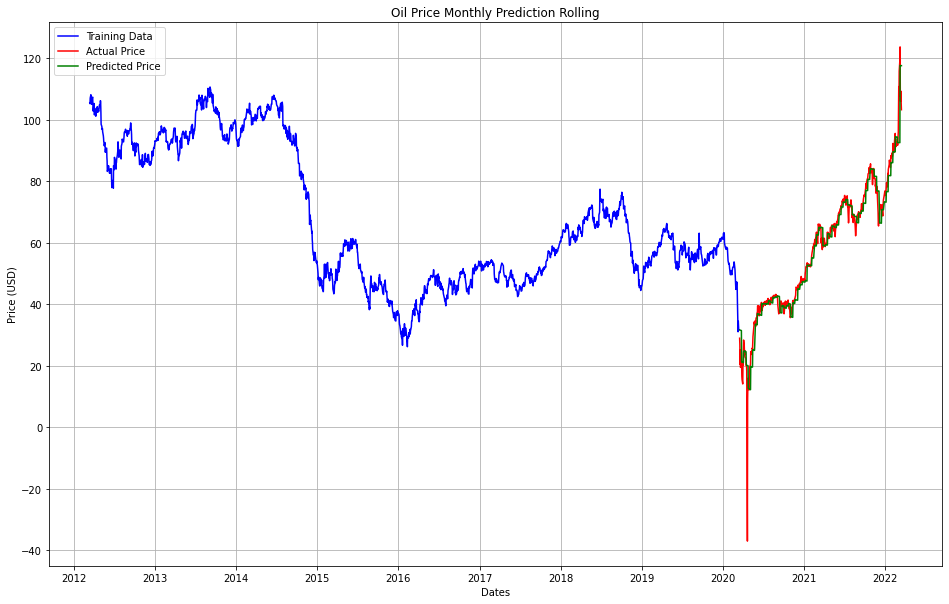

In [44]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['DCOILWTICO'], color='blue', label='Training Data')
plt.plot(test.index, test['DCOILWTICO'], color='red', label='Actual Price')
plt.plot(test.index, predictions[:502], color='green', label='Predicted Price')
plt.title('Oil Price Monthly Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [45]:
# Looking at predicting the prices at the daily interval
history = [x for x in train_val]
predictions = []
for t in range(502):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(1)
    yhats = output[0]
    predictions.extend(yhats)
    history.extend(test_val[t * 1 : (t + 1) * 1])
mse = mean_squared_error(test_val, predictions[:502])
mae = mean_absolute_error(test_val, predictions[:502])
mape = mean_absolute_percentage_error(test_val, predictions[:502])
print('Testing Mean Squared Error: %.3f' % mse)
print('Testing Mean Absolute Error: %.3f' % mae)
print('Testing Mean Absolute Percentage Error: %.3f' % mape)

Testing Mean Squared Error: 14.717
Testing Mean Absolute Error: 1.507
Testing Mean Absolute Percentage Error: 0.043


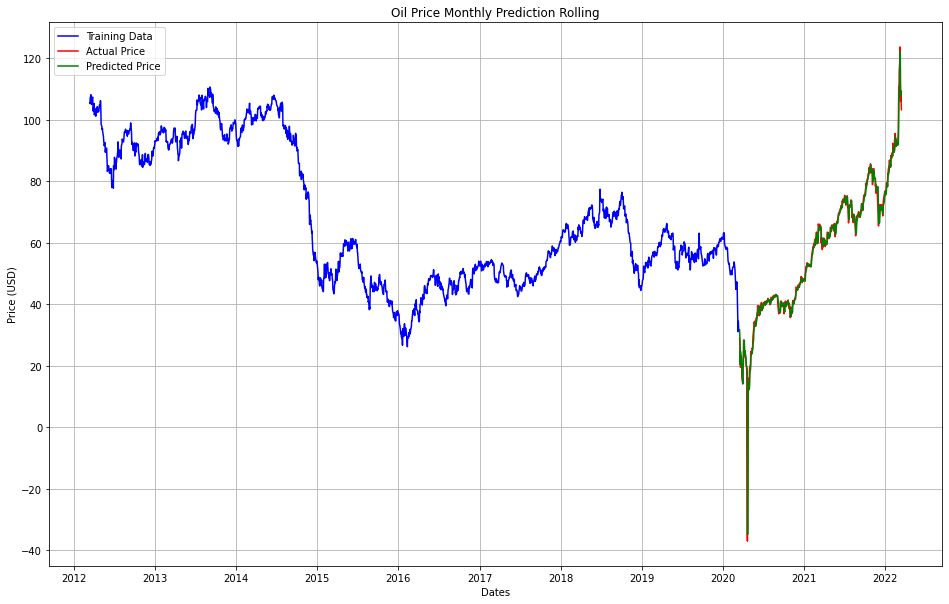

In [46]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['DCOILWTICO'], color='blue', label='Training Data')
plt.plot(test.index, test['DCOILWTICO'], color='red', label='Actual Price')
plt.plot(test.index, predictions[:502], color='green', label='Predicted Price')
plt.title('Oil Price Monthly Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [47]:
# The monthly predictions model has error statistics (MSE of 74.34, MAE of 5.87, MAPE of 0.13), the bi-weekly predictions model error statistics of (MSE of 35.24, MAE of 3.72, MAPE of 0.09), the weekly predictions model has error statistics of (MSE of 20.35, MAE of 2.53, MAPE of 0.06), and the daily predictions model has error statistics of (MSE of 14.72, MAE of 1.51, MAPE of 0.04). For the average civilian, the weekly model would be the best given that one wouldn't be refueling everyday. For the investor, the daily model is best to help keep up with the price fluctuation.

In [49]:
# Looking at predicting the prices at the weekly interval with model_310
history = [x for x in train_val]
predictions = []
for t in range(72):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(7)
    yhats = output[0]
    predictions.extend(yhats)
    history.extend(test_val[t * 7 : (t + 1) * 7])
mse = mean_squared_error(test_val, predictions[:502])
mae = mean_absolute_error(test_val, predictions[:502])
mape = mean_absolute_percentage_error(test_val, predictions[:502])
print('Testing Mean Squared Error: %.3f' % mse)
print('Testing Mean Absolute Error: %.3f' % mae)
print('Testing Mean Absolute Percentage Error: %.3f' % mape)

Testing Mean Squared Error: 20.576
Testing Mean Absolute Error: 2.546
Testing Mean Absolute Percentage Error: 0.058


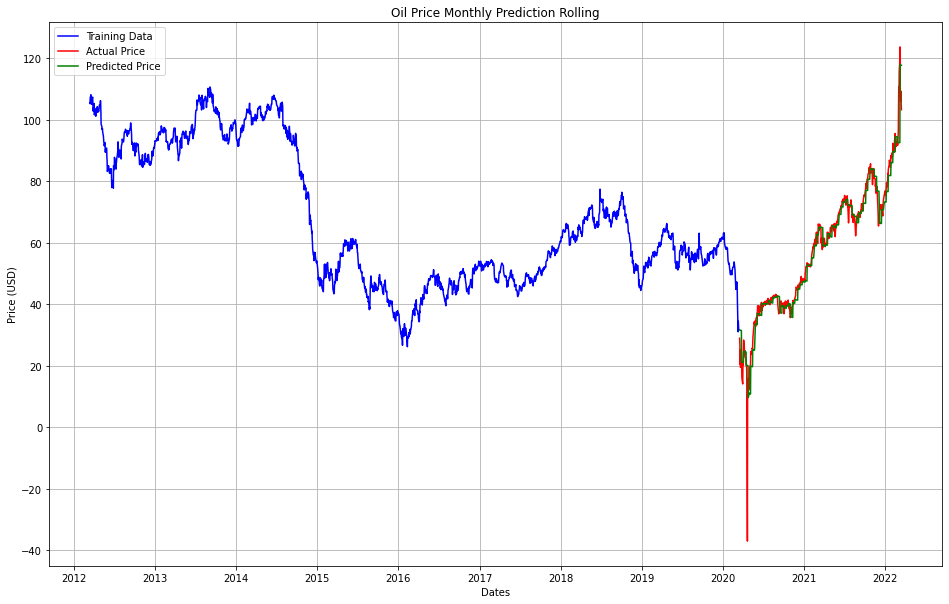

In [51]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['DCOILWTICO'], color='blue', label='Training Data')
plt.plot(test.index, test['DCOILWTICO'], color='red', label='Actual Price')
plt.plot(test.index, predictions[:502], color='green', label='Predicted Price')
plt.title('Oil Price Monthly Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [53]:
# Looking at predicting the prices at the weekly interval with model_211
history = [x for x in train_val]
predictions = []
for t in range(72):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(7)
    yhats = output[0]
    predictions.extend(yhats)
    history.extend(test_val[t * 7 : (t + 1) * 7])
mse = mean_squared_error(test_val, predictions[:502])
mae = mean_absolute_error(test_val, predictions[:502])
mape = mean_absolute_percentage_error(test_val, predictions[:502])
print('Testing Mean Squared Error: %.3f' % mse)
print('Testing Mean Absolute Error: %.3f' % mae)
print('Testing Mean Absolute Percentage Error: %.3f' % mape)

Testing Mean Squared Error: 20.357
Testing Mean Absolute Error: 2.527
Testing Mean Absolute Percentage Error: 0.056


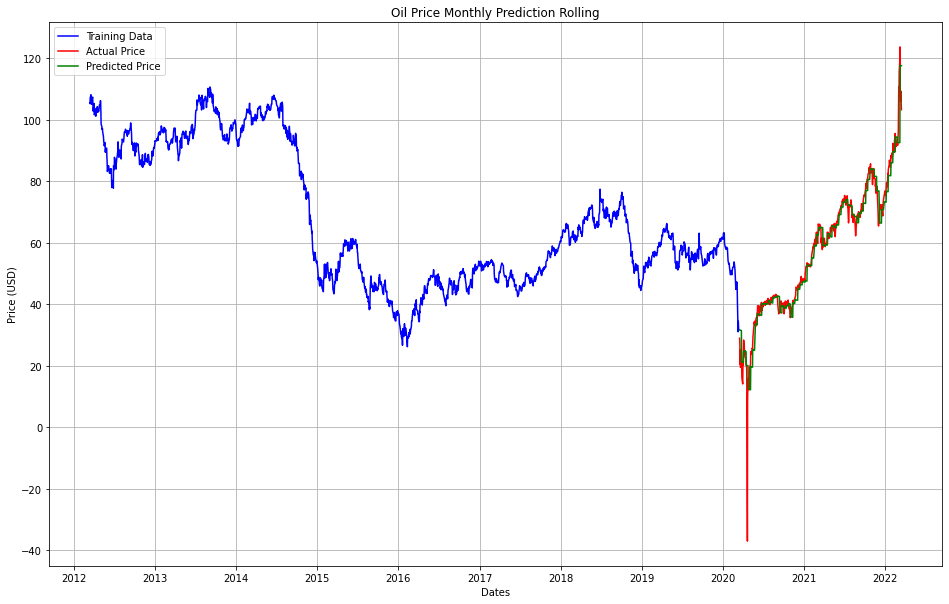

In [54]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['DCOILWTICO'], color='blue', label='Training Data')
plt.plot(test.index, test['DCOILWTICO'], color='red', label='Actual Price')
plt.plot(test.index, predictions[:502], color='green', label='Predicted Price')
plt.title('Oil Price Monthly Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [55]:
# model_111 has the lowest overall errors across MSE, MAE, and MAPE.